# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

,Name,Gender,Count
7740,Jacob,M,242706
5801,Emma,F,214757
13040,Michael,M,214228
6010,Ethan,M,209153
7499,Isabella,F,204742
18015,William,M,197796
9211,Joshua,M,191444
16545,Sophia,F,191421
4501,Daniel,M,191303
5789,Emily,F,190211


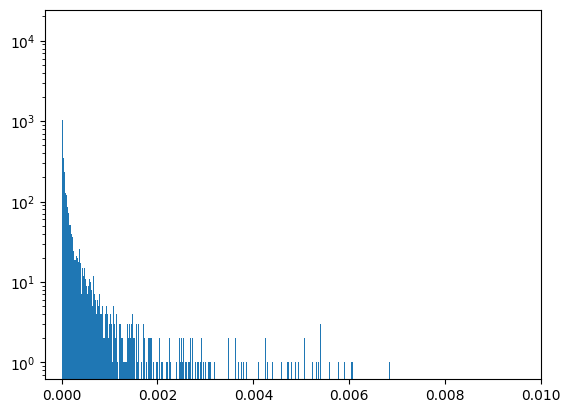

('mean : 1870.10', 'median: 45.0', 'std: 10493.34')


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
df = pd.read_csv('US_Baby_Names_right.csv')
baby_names = df
baby_names = baby_names.drop(columns=['Unnamed: 0', 'Id'])




cs = baby_names['Gender'].value_counts()
male_count = cs['M']
female_count = cs['F']






name_count = baby_names.groupby(['Name', 'Gender'], as_index= False)['Count'].sum()
name_count_no_gender = baby_names.groupby(['Name'], as_index= False)['Count'].sum()

name_count = name_count.sort_values('Count',ascending=False)



display(name_count.head(10))



f_name_count = name_count[name_count['Gender'] == 'F']
m_name_count = name_count[name_count['Gender'] == 'M']



#display(f_name_count.head(10))
#display(m_name_count.head(10))



top, topm , topf = name_count.head(10) , m_name_count.head(10), f_name_count.head(10)



# plt.bar(topm['Name'],topm['Count'], color='skyblue')
# plt.xticks(rotation = 45)
# plt.title('top 10 M imion w US')
# plt.show()


len(name_count_no_gender['Name']) == baby_names['Name'].nunique()



name_count['Probability'] = name_count['Count'] / baby_names['Count'].sum()
# display(name_count.head(10))
# print(name_count.columns)
# print(name_count['Probability'].sum()) #0.999999...



suma = name_count['Probability'].sum()
name_count['Probability'] = name_count['Probability'] / suma
# display(name_count.head(10))
# print(name_count['Probability'].sum()) # 1.0



#generator imion

def genreator_imion(n_buffer=1000):
    while True:
        generator = name_count.sample(weights='Probability', replace=True, n = n_buffer) #ze zwracaniem
        for name in generator['Name']:
            yield name
gen = genreator_imion()


plt.hist(name_count['Probability'], bins = 500)
plt.yscale('log')
plt.xlim(right = 0.01)
plt.show()


mean , median , std = name_count['Count'].mean() , name_count['Count'].median() , name_count['Count'].std()
x = (f'mean : {mean:.2f}', f'median: {median}', f'std: {std:.2f}')
print(x)



In [24]:
df = baby_names.iloc[0:5]
display(df)
df = baby_names.groupby(['Name', 'Gender', 'State'], as_index=False)['Count'].sum()
df = df.sort_values(ascending=False, by = 'Count')
gender = df.groupby(['Gender'], as_index=False)['Count'].sum()
names_by_gender = df.groupby('Gender', as_index=False)['Name'].nunique()
display(df.head())
display(gender)
display(names_by_gender)

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


,Name,Gender,State,Count
44958,Daniel,M,CA,36751
15449,Anthony,M,CA,34095
75651,Jacob,M,CA,33819
73430,Isabella,F,CA,31492
157386,Sophia,F,CA,30585


,Gender,Count
0,F,16380293
1,M,19041199


,Gender,Name
0,F,10929
1,M,8012


Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

Krok 8: Jak wiele różnych imion występuje w zbiorze?

Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

## Część II

Krok 1: Wczytaj dane

Krok 2: Podejrzyj pierwsze 25 rekordów

Krok 3: Podejrzyj ostatnie 10 rekordów

Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

Krok 5: Wypisz nazwy kolumn

Krok 6: Ile różnych zawodów jest w zbiorze?

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

,occupation,count,male,female,frequency,avg_age,F_avg_age,M_avg_age
0,student,196,136,60,0.207847,22.081633,20.750000,22.669118
1,other,105,69,36,0.111347,34.523810,35.472222,34.028986
2,educator,95,69,26,0.100742,42.010526,39.115385,43.101449
3,administrator,79,43,36,0.083775,38.746835,40.638889,37.162791
4,engineer,67,65,2,0.071050,36.388060,29.500000,36.600000
5,programmer,66,60,6,0.069989,33.121212,32.166667,33.216667
6,librarian,51,22,29,0.054083,40.000000,40.000000,40.000000
7,writer,45,26,19,0.047720,36.311111,37.631579,35.346154
8,executive,32,29,3,0.033934,38.718750,44.000000,38.172414
9,scientist,31,28,3,0.032874,35.548387,28.333333,36.321429


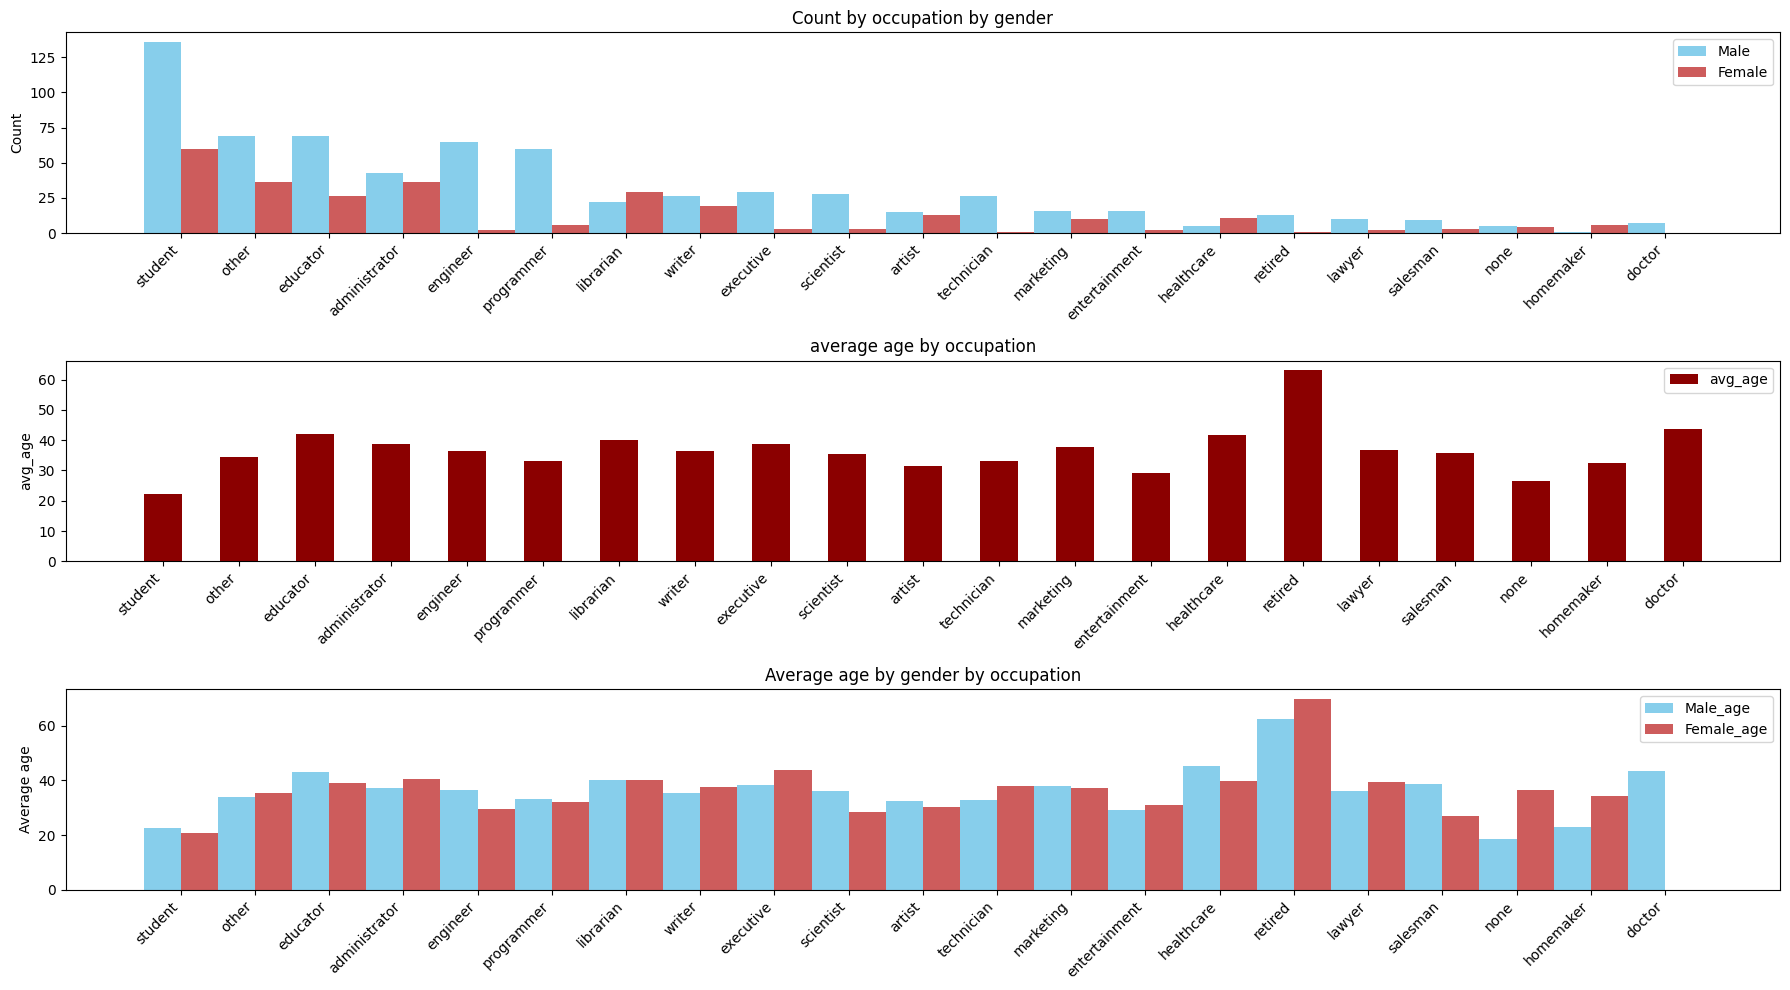

,occupation,count,male,female,frequency,avg_age,F_avg_age,M_avg_age
0,student,196,136,60,0.207847,22.081633,20.750000,22.669118
1,other,105,69,36,0.111347,34.523810,35.472222,34.028986
2,educator,95,69,26,0.100742,42.010526,39.115385,43.101449
3,administrator,79,43,36,0.083775,38.746835,40.638889,37.162791
4,engineer,67,65,2,0.071050,36.388060,29.500000,36.600000
5,programmer,66,60,6,0.069989,33.121212,32.166667,33.216667
6,librarian,51,22,29,0.054083,40.000000,40.000000,40.000000
7,writer,45,26,19,0.047720,36.311111,37.631579,35.346154
8,executive,32,29,3,0.033934,38.718750,44.000000,38.172414
9,scientist,31,28,3,0.032874,35.548387,28.333333,36.321429


In [25]:
df = pd.read_csv('ocupation.csv', sep='|')
df1 = df['occupation'].value_counts().reset_index()
df1['male'] = df1['occupation'].apply(lambda x : len( df[(df['occupation'] == x) &  (df['gender'] == 'M')]))
df1['female'] = df1['occupation'].apply(lambda x : len( df[(df['occupation'] == x) &  (df['gender'] == 'F')]))
df1['frequency'] = df1['count'] / df1['count'].sum()
df1['avg_age'] = df1['occupation'].apply(lambda x : df[(df['occupation'] == x)]['age'].sum() / len(df[df['occupation'] == x]))
df1['F_avg_age'] = df1['occupation'].apply(lambda x : df[(df['occupation'] == x) & (df['gender'] == 'F')]['age'].sum() / 
(len(df[(df['occupation'] == x) & (df['gender'] == 'F')]) if len(df[(df['occupation'] == x) & (df['gender'] == 'F')]) != 0 else 1))
df1['M_avg_age'] = df1['occupation'].apply(lambda x : df[(df['occupation'] == x) & (df['gender'] == 'M')]['age'].sum() / 
(len(df[(df['occupation'] == x) & (df['gender'] == 'M')]) if len(df[(df['occupation'] == x) & (df['gender'] == 'M')]) != 0 else 1))
display(df1)


index = np.arange(len(df1))
width = 0.5
men = df1['male']
woman = df1['female']
age = df1['avg_age']
M_age = df1['M_avg_age']
F_age = df1['F_avg_age']
labels = df1['occupation']


fig , (ax , ax1, ax2) = plt.subplots(3 , 1, figsize = (18,10))
ax.bar(index-width/2 , men , width , color='skyblue' , label = 'Male')
ax.bar(index+width/2 , woman , width , color='indianred' , label = 'Female')
ax.set_ylabel('Count')
ax.set_title('Count by occupation by gender')
ax.set_xticks(index)
ax.set_xticklabels(labels, rotation = 45, ha= 'right')
ax.legend()



ax1.bar(index, age, width, color='darkred', label= 'avg_age')
ax1.set_ylabel('avg_age')
ax1.set_title('average age by occupation')
ax1.set_xticks(index)
ax1.set_xticklabels(labels, rotation=45, ha='right')
ax1.legend()



ax2.bar(index-width/2 , M_age , width , color='skyblue' , label = 'Male_age')
ax2.bar(index+width/2 , F_age , width , color='indianred' , label = 'Female_age')
ax2.set_ylabel('Average age')
ax2.set_title('Average age by gender by occupation')
ax2.set_xticks(index)
ax2.set_xticklabels(labels, rotation = 45, ha= 'right')
ax2.legend()
plt.tight_layout()
plt.show()


display(df1)